In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import statistics

In [ ]:
df = sns.load_dataset('tips') # tips received by waiter
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **1. Tips Data**

In [ ]:
# mean
np.mean(df['total_bill'])

19.78594262295082

In [ ]:
# median
np.median(df['total_bill'])

17.795

mean != median
mean > median: Right tailed
Distributions is not symmetrical and there may be some data point considered as outliers.

In [ ]:
# mode
# using statistics module

statistics.mode(df['total_bill'])

13.42

**Percentiles and Outliers (IQR)**

In [ ]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19,
           107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15,
           12, 10, 14, 13, 15, 10]

In [ ]:
#step 1
dataset = sorted(dataset)
print(dataset)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [ ]:
# step 2: Calculate Q2 and Q3:
Q1, Q3 = np.percentile(dataset, [25,75])
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

Q1: 12.0
Q3: 15.0


In [ ]:
#step 3: calculate IQR

iqr = Q3 - Q1
print(f"IQR: {iqr}")

IQR: 3.0


In [ ]:
#step 4:
lower_fence = Q1 - (1.5*iqr)
upper_fence = Q3 + (1.5*iqr)

In [ ]:
#conclusion

def detect_outlier_using_iqr(data: list, lower_fence: float, upper_fence: float):
  """
  Detect outlier using IQR
  """

  outliers = []

  for item in data:
    if item > upper_fence or item < lower_fence:
      outliers.append(item)

  return outliers


In [ ]:
  outliers = detect_outlier_using_iqr(dataset, lower_fence, upper_fence)
  print(outliers)

[102, 107, 108]


**Box Plot**

<Axes: >

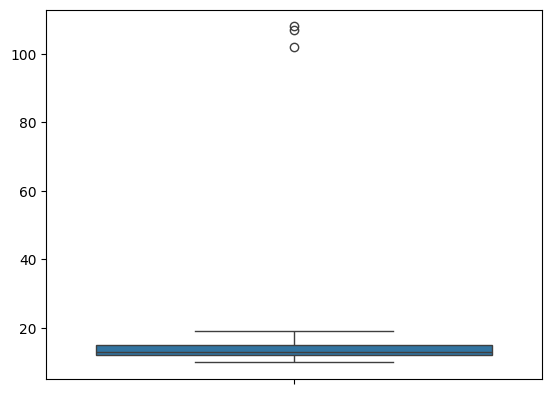

In [ ]:
sns.boxplot(data=dataset)

In [ ]:
# Outlier detection using Z score


In [ ]:
import numpy as np

dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19,
           107, 10, 13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15,
           12, 10, 14, 13, 15, 10]

# detect outliers
THRESHOLD = 3
outliers = []

# get mean
mean = np.mean(dataset)

# get standard deviation
std = np.std(dataset)

# Apply Z score for each and every point in the dataset
for i in dataset:
    z_score = (i - mean) / std
    # check for outliers
    # append to outlier list in the case of an outlier
    if np.abs(z_score) > THRESHOLD:
        outliers.append(i)

print(outliers)


[102, 107, 108]
